In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud
import nltk
from seaborn import color_palette

nltk.download('stopwords')

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

df = pd.read_csv('../../dataset/tables_clean.csv')

df.describe()

[nltk_data] Downloading package stopwords to /home/marco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,n_columns,n_rows,n_cells,caption_len,n_references,n_footnotes
count,3272.000000,3272.00000,3272.000000,3272.000000,3272.000000,3272.000000
mean,4.475856,12.20599,62.713325,230.204462,13.555318,1.415648
std,3.132072,19.11003,150.777874,604.462453,18.508065,49.789648
min,1.000000,1.00000,1.000000,3.000000,0.000000,0.000000
25%,3.000000,4.00000,15.000000,43.000000,3.000000,0.000000
50%,4.000000,8.00000,27.000000,74.000000,8.000000,0.000000
75%,5.000000,14.00000,55.000000,188.000000,17.000000,0.000000
max,79.000000,433.00000,3860.000000,14562.000000,216.000000,2731.000000


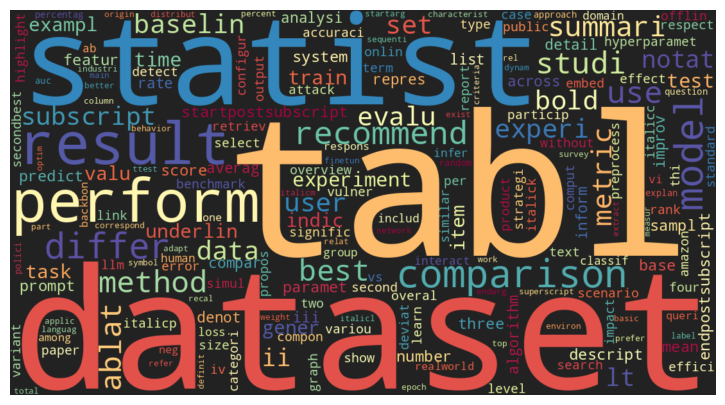

In [4]:
# TF-IDF Analysis of the dataset

# Create a vectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer
X = vectorizer.fit_transform(df['caption'].fillna(''))

# Create a transformer
transformer = TfidfTransformer()

# Fit the transformer
tfidf = transformer.fit_transform(X)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Create a dataframe
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=feature_names)

# Get the top 10 words
top_words = df_tfidf.sum().sort_values(ascending=False).head(300)

# filter out common words and numbers
stop_words = set(stopwords.words('english'))
top_words = top_words[~top_words.index.isin(stop_words)]
top_words = top_words[~top_words.index.str.isnumeric()]

#dark grey


# Plot the wordcloud of the top 10 words
wordcloud = (WordCloud(width=1100, height=600, background_color='#222222', colormap='Spectral_r')
             .generate_from_frequencies(top_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('output/wordcloud.png', dpi=1000)


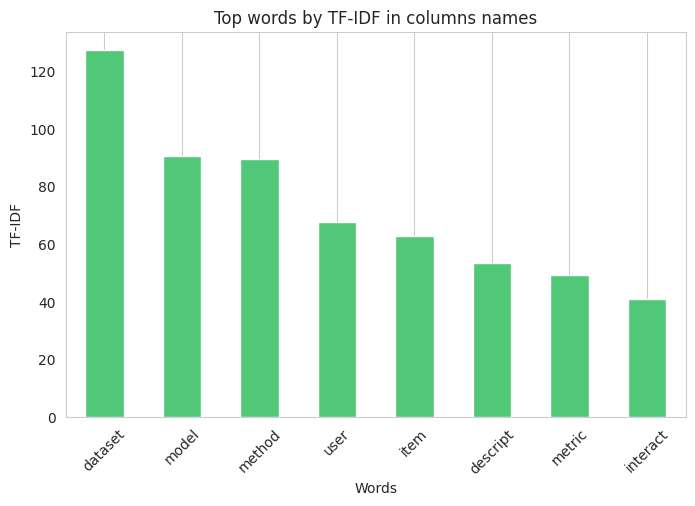

In [7]:

# TF-IDF Analysis of the dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud

# Create a vectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer
X = vectorizer.fit_transform(df['columns'].fillna(''))

# Create a transformer
transformer = TfidfTransformer()

# Fit the transformer
tfidf = transformer.fit_transform(X)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Create a dataframe
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=feature_names)
top_words = df_tfidf.sum().sort_values(ascending=False).head(8)

# filter out common words and numbers
stop_words = set(stopwords.words('english'))
top_words = top_words[~top_words.index.isin(stop_words)]
top_words = top_words[~top_words.index.str.isnumeric()]

# bar plot of the top 10 words
plt.figure(figsize=(8, 5))
top_words.plot(kind='bar', color=palette[3])
plt.xlabel('Words')
plt.ylabel('TF-IDF')
plt.title('Top words by TF-IDF in columns names')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('output/top_words.png', dpi=300)

